In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#Carregando o arquivo , o arquivo esta aqui no colab
file_path = 'drive/MyDrive/DATASETS/filmes_filtrados_sem_nulos.csv'
data = pd.read_csv(file_path , sep=",")

data.head(10)

data_copy = data.copy()
data_copy.head(10)

,id,title,genres,original_language,popularity,release_date,budget,revenue,runtime,status,vote_average,vote_count
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,8763.998,2023-08-02,129000000.0,3.520565e+08,116.0,Released,7.079,1365.0
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,5953.227,2023-04-05,18000000.0,6.567582e+07,103.0,Released,7.433,545.0
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,5410.496,2024-07-24,200000000.0,1.326387e+09,128.0,Released,7.765,3749.0
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,5409.104,2023-06-06,200000000.0,4.070455e+08,127.0,Released,7.340,1007.0
4,693134,Dune: Part Two,Science Fiction-Adventure,en,4742.163,2024-02-27,190000000.0,6.838137e+08,167.0,Released,8.300,2770.0
5,912649,Venom: The Last Dance,Science Fiction-Action-Adventure,en,4674.885,2024-10-22,120000000.0,3.100000e+08,109.0,Released,6.522,603.0
6,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,4425.387,2023-02-15,200000000.0,4.757662e+08,125.0,Released,6.507,2811.0
7,677179,Creed III,Drama-Action,en,3994.342,2023-03-01,75000000.0,2.690000e+08,116.0,Released,7.262,1129.0
8,614479,Insidious: The Red Door,Horror-Mystery-Thriller,en,3512.648,2023-07-05,16000000.0,1.755821e+08,107.0,Released,6.750,564.0
9,519182,Despicable Me 4,Animation-Family-Comedy-Action,en,3195.720,2024-06-20,100000000.0,8.103297e+08,94.0,Released,7.350,984.0


Tamanho do conjunto de treino X: (6864, 11)
Tamanho do conjunto de teste X: (1717, 11)
Tamanho do conjunto de treino y: (6864,)
Tamanho do conjunto de teste y: (1717,)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# 1. Pré-processamento dos dados
# Converter a data e extrair o ano
data_copy['release_date'] = pd.to_datetime(data_copy['release_date'])
data_copy['release_year'] = data_copy['release_date'].dt.year

# 2. Seleção de features e target
# Adicionei mais features potencialmente relevantes
features = ['runtime', 'release_year', 'budget', 'popularity', 'vote_average']
X = data_copy[features]
y = data_copy['revenue']

# 3. Divisão dos dados (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42  # para reprodutibilidade
)

# 4. Criação e treino do modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Avaliação do modelo
# Previsões nos dados de teste
y_pred = model.predict(X_test)

# Métricas de avaliação
print("\nMétricas de Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):,.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# 6. Interpretação do modelo
print("\nInterpretação do Modelo:")
print(f"Intercepto: {model.intercept_:,.2f}")

print("\nCoeficientes (importância das features):")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:,.2f}")


Métricas de Performance:
RMSE: 110,189,212.66
R² Score: 0.61

Interpretação do Modelo:
Intercepto: 90,722,059.06

Coeficientes (importância das features):
runtime: -70,072.44
release_year: -139,878.46
budget: 2.98
popularity: 21,382.92
vote_average: 29,874,882.59


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

## 1. Pré-processamento dos dados
# Converter a data e extrair o ano
data_copy['release_date'] = pd.to_datetime(data_copy['release_date'])
data_copy['release_year'] = data_copy['release_date'].dt.year

# Criar features adicionais
data_copy['budget_per_minute'] = data_copy['budget'] / data_copy['runtime']
data_copy['log_budget'] = np.log1p(data_copy['budget'])
data_copy['log_popularity'] = np.log1p(data_copy['popularity'])

## 2. Seleção de features e target
features = [
    'runtime',
    'release_year',
    'budget',
    'popularity',
    'vote_average',
    'vote_count',
    'budget_per_minute',
    'log_budget',
    'log_popularity'
]

X = data_copy[features]
y = np.log1p(data_copy['revenue'])  # Transformação logarítmica para a variável target

## 3. Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

## 4. Criação e treino do modelo Random Forest
# Criando um pipeline com padronização e o modelo
model = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1  # Usa todos os cores do processador
    ))
])

# Treinando o modelo
model.fit(X_train, y_train)

## 5. Avaliação do modelo
# Previsões nos dados de teste
y_pred = model.predict(X_test)

# Convertendo de volta para a escala original (exponencial)
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Métricas de avaliação
print("\nMétricas de Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)):,.2f}")
print(f"MAE: {mean_absolute_error(y_test_exp, y_pred_exp):,.2f}")
print(f"R² Score: {r2_score(y_test_exp, y_pred_exp):.2f}")

## 6. Análise de importância das features
importances = model.named_steps['rf'].feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\nImportância das Features:")
print(feature_importance)

## 7. Visualização dos resultados
import matplotlib.pyplot as plt

# Gráfico de importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Importância das Features no Modelo Random Forest')
plt.xlabel('Importância Relativa')
plt.ylabel('Features')
plt.show()

# Gráfico de valores reais vs previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test_exp, y_pred_exp, alpha=0.5)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--')
plt.xlabel('Valor Real (Revenue)')
plt.ylabel('Previsão (Revenue)')
plt.title('Valores Reais vs Previsões')
plt.show()

ValueError: Input X contains infinity or a value too large for dtype('float64').


Métricas de Performance:
RMSE: 89,684,699.66
MAE: 35,182,277.28
R² Score: 0.74

Importância das Features:
             Feature  Importance
5         vote_count    0.458318
6  budget_per_minute    0.112389
7         log_budget    0.100293
2             budget    0.096639
1       release_year    0.066123
0            runtime    0.055988
4       vote_average    0.054039
8     log_popularity    0.028110
3         popularity    0.028102


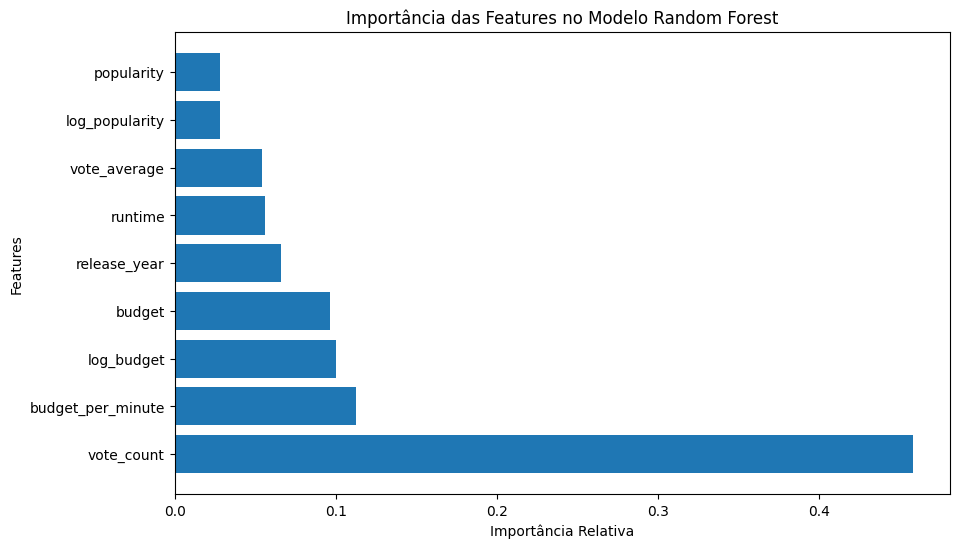

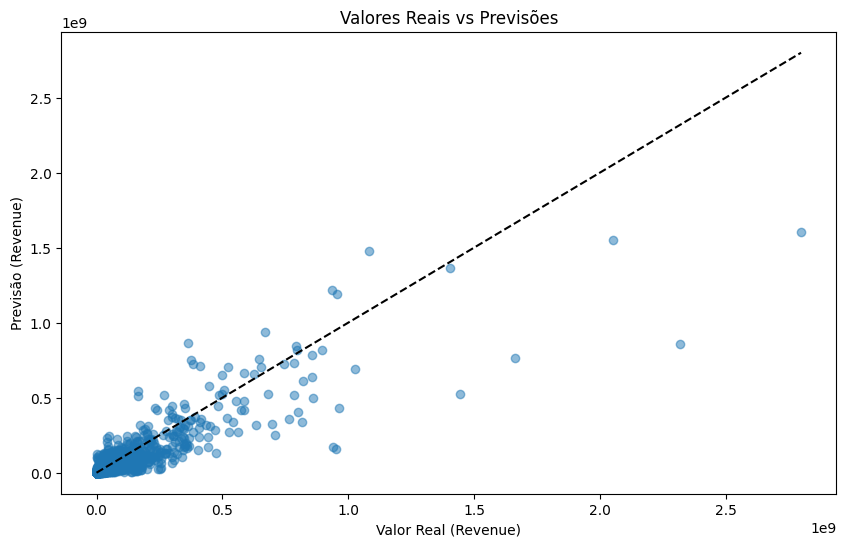

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for plotting

## 1. Pré-processamento dos dados
# Converter a data e extrair o ano
data_copy['release_date'] = pd.to_datetime(data_copy['release_date'])
data_copy['release_year'] = data_copy['release_date'].dt.year

# Criar features adicionais
# Handle division by zero for 'runtime' before creating 'budget_per_minute'
# Replace 0 runtime with a small number or handle directly
data_copy['runtime'] = data_copy['runtime'].replace(0, np.nan) # Replace 0 runtime with NaN
data_copy['budget_per_minute'] = data_copy['budget'] / data_copy['runtime']
data_copy['budget_per_minute'] = data_copy['budget_per_minute'].fillna(0) # Replace resulting NaNs (from 0 runtime) with 0

data_copy['log_budget'] = np.log1p(data_copy['budget'])
data_copy['log_popularity'] = np.log1p(data_copy['popularity'])

## 2. Seleção de features e target
features = [
    'runtime',
    'release_year',
    'budget',
    'popularity',
    'vote_average',
    'vote_count',
    'budget_per_minute',
    'log_budget',
    'log_popularity'
]

X = data_copy[features]
y = np.log1p(data_copy['revenue'])  # Transformação logarítmica para a variável target

## 3. Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

## 4. Criação e treino do modelo Random Forest
# Criando um pipeline com padronização e o modelo
model = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1  # Usa todos os cores do processador
    ))
])

# Treinando o modelo
model.fit(X_train, y_train)

## 5. Avaliação do modelo
# Previsões nos dados de teste
y_pred = model.predict(X_test)

# Convertendo de volta para a escala original (exponencial)
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Métricas de avaliação
print("\nMétricas de Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)):,.2f}")
print(f"MAE: {mean_absolute_error(y_test_exp, y_pred_exp):,.2f}")
print(f"R² Score: {r2_score(y_test_exp, y_pred_exp):.2f}")

## 6. Análise de importância das features
importances = model.named_steps['rf'].feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\nImportância das Features:")
print(feature_importance)

## 7. Visualização dos resultados

# Gráfico de importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Importância das Features no Modelo Random Forest')
plt.xlabel('Importância Relativa')
plt.ylabel('Features')
plt.show()

# Gráfico de valores reais vs previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test_exp, y_pred_exp, alpha=0.5)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--')
plt.xlabel('Valor Real (Revenue)')
plt.ylabel('Previsão (Revenue)')
plt.title('Valores Reais vs Previsões')
plt.show()